In [43]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [44]:

my_url = 'https://vaz.io/tesla'

response = requests.get(my_url)

soup = BeautifulSoup(response.text, 'html.parser')

#find all tables within the html
tables = soup.find_all('table')

In [45]:
#find the table with the quarterly evolution
for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue' in str(table)):
        table_index = index
        break
#Store the data in a dataFrame:
revenue_tesla = pd.DataFrame(columns=['Date', 'Revenue'])
for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col !=[]):
        Date = col[0].text
        Revenue = col[1].text.replace('$', '').replace(',','')
        revenue_tesla = pd.concat([revenue_tesla, pd.DataFrame({
            'Date': Date,
            'Revenue': Revenue
        }, index = [0])], ignore_index= True)

revenue_tesla.head()

,Date,Revenue
0,2023-12-31,25167
1,2023-09-30,23350
2,2023-06-30,24927
3,2023-03-31,23329
4,2022-12-31,24318


In [46]:
revenue_tesla = revenue_tesla[revenue_tesla['Revenue'] != '']
revenue_tesla

,Date,Revenue
0,2023-12-31,25167
1,2023-09-30,23350
2,2023-06-30,24927
3,2023-03-31,23329
4,2022-12-31,24318
5,2022-09-30,21454
6,2022-06-30,16934
7,2022-03-31,18756
8,2021-12-31,17719
9,2021-09-30,13757


In [47]:
import sqlite3

con = sqlite3.connect('Tesla.db')
con

In [48]:
cur = con.cursor()
cur.execute("""CREATE TABLE Revenue (Date, Revenue)""")


OperationalError: table Revenue already exists

In [ ]:
#Convert DataFrame to a NumPy record array.
tesla_values = list(revenue_tesla.to_records(index=False))
tesla_values[:10] #here we print the 10 first rows

[('2023-12-31', '25167'),
 ('2023-09-30', '23350'),
 ('2023-06-30', '24927'),
 ('2023-03-31', '23329'),
 ('2022-12-31', '24318'),
 ('2022-09-30', '21454'),
 ('2022-06-30', '16934'),
 ('2022-03-31', '18756'),
 ('2021-12-31', '17719'),
 ('2021-09-30', '13757')]

In [ ]:
cur.executemany("INSERT INTO Revenue VALUES (?,?)", tesla_values)
con.commit() #this will store the values

In [ ]:
# Check the data from the database
for row in cur.execute("SELECT * FROM revenue"):
    print(row)

('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-0

### Visualize Data

1. Visualization of all our data

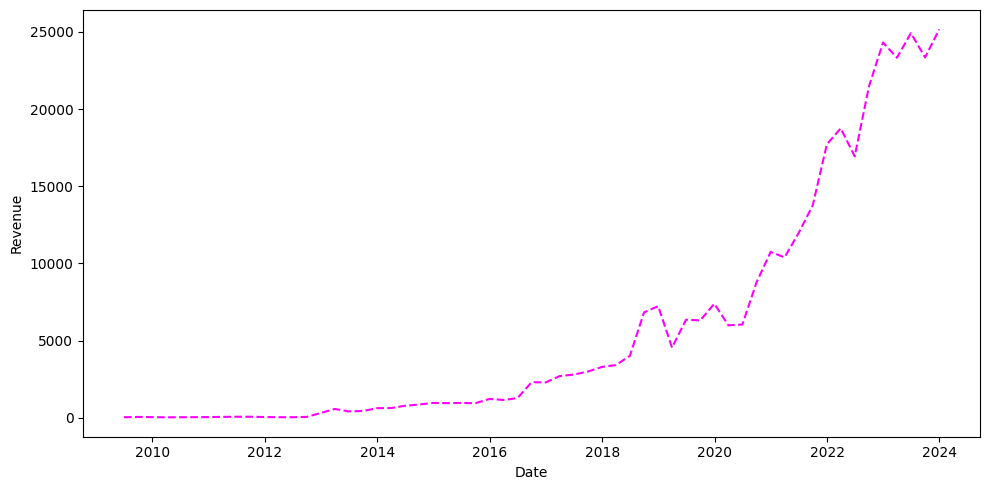

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

revenue_tesla["Date"] = pd.to_datetime(revenue_tesla["Date"]) #since the Date column is in str, we convert it to datetime type and store the result
revenue_tesla["Revenue"] = revenue_tesla["Revenue"].astype('int') #we convert to an int type the column Revenue that was in str
sns.lineplot(data = revenue_tesla, x = "Date", y = "Revenue", color='magenta', linestyle='--')

plt.tight_layout()

plt.show()

2. Visualization of our Revenue for each year

/tmp/ipykernel_557/2730409364.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_year, x="Date", y="Revenue", palette=palette)
/tmp/ipykernel_557/2730409364.py:14: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=revenue_by_year, x="Date", y="Revenue", palette=palette)


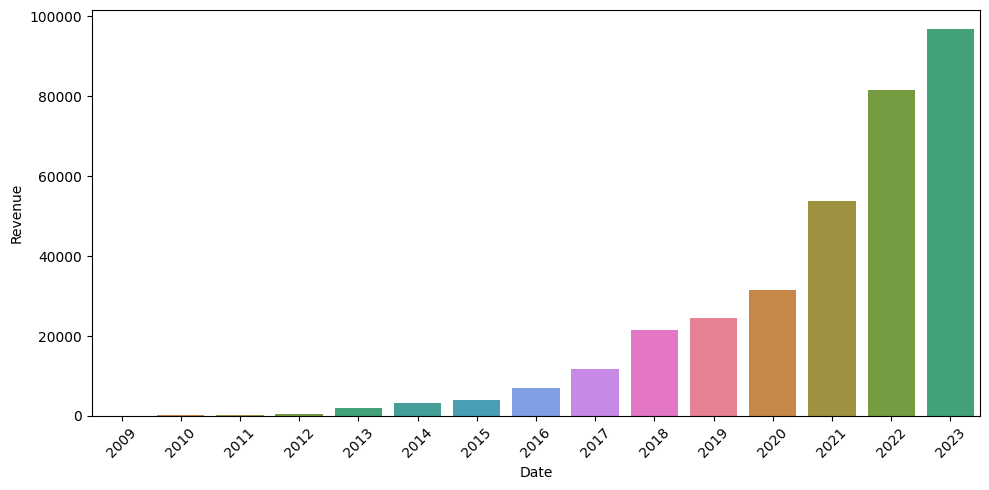

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

revenue_tesla["Date"] = pd.to_datetime(revenue_tesla["Date"])
# Extract year from the "Date" column
# Group by year and sum the revenue
revenue_by_year = revenue_tesla.groupby(revenue_tesla["Date"].dt.year)["Revenue"].sum().reset_index() 
#we use reset_index after grouping all the revenues in the corresponding years returning like a new column with all the values

#a little of aesthetic 
palette = sns.color_palette("husl", 10)

sns.barplot(data=revenue_by_year, x="Date", y="Revenue", palette=palette)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()



3. Visualization of our data 

/tmp/ipykernel_557/4243716926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = revenue_by_month, x = "Date", y = "Revenue", palette=palette)


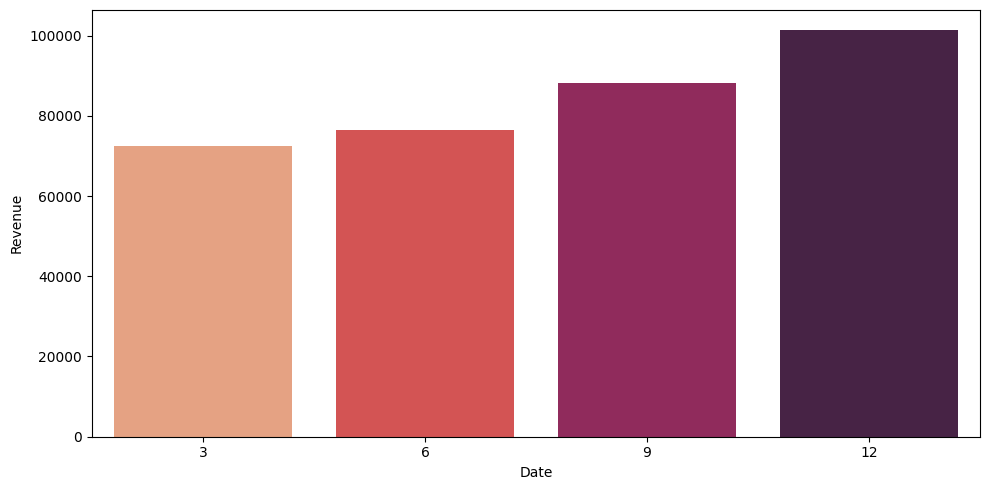

In [79]:
fig, axis = plt.subplots(figsize = (10, 5))

#filtering it by month
revenue_by_month = revenue_tesla.groupby(revenue_tesla["Date"].dt.month).sum().reset_index()

palette = sns.color_palette("rocket_r", 4)
sns.barplot(data = revenue_by_month, x = "Date", y = "Revenue", palette=palette)

plt.tight_layout()

plt.show()